## Least squares Method

$$
\large
f(x) = Ax + B \quad 
\left\{
\begin{array}{ll}
Slope & A = \frac{Cov(x, y)}{\sigma^2 x} \\
Intercept & B = \mu y - A\mu x
\end{array}
\right.
$$

In [257]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [258]:
x = np.linspace(0, 100, 50)
x_mean = sum(x)/len(x)
x_mean

50.000000000000007

In [259]:
t = x + np.random.randn(len(x))*7 + 30
t_mean = sum(t)/len(t)
t_mean

80.307505283572809

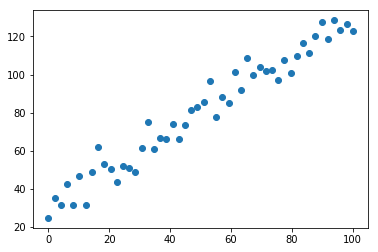

In [260]:
plt.scatter(x, t)

In [261]:
xx = []
tt = []
for i, j in zip(x, t):
   xx.append( (i - x_mean)**2 )
   tt.append( np.abs((j - t_mean)*(i - x_mean)) )

xx_mean = sum(xx)
tt_mean = sum(tt)
xx_mean, tt_mean

(43367.346938775503, 43153.433298986383)

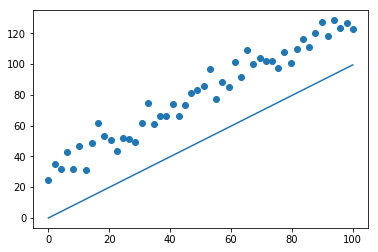

In [262]:
a = tt_mean / xx_mean
plt.scatter(x, t)
plt.plot(x, a*x)

0.99506740313 30.5541351271


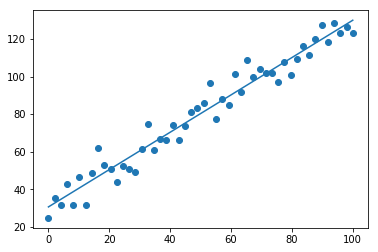

In [263]:
b = t_mean - a*x_mean
print(a, b)
plt.scatter(x, t)
plt.plot(x, a*x + b)

## Gradient Descent

$$
\large Loss\;(MSE) \; = \; \frac{1}{2n}\sum_{i=1}^{n}(f(x)_i-t_i)^2 \qquad ※f(x) = Ax + B \\
$$

$$
\large \frac{dLoss}{dA} \; = \; -\frac{1}{n}\sum_{i=1}^n(t_i - Ax - B)x
$$

$$
\large \frac{dLoss}{dB} \; = \; -\frac{1}{n}\sum_{i=1}^n (t_i - Ax - B)
$$

$$
\large ※(A, B)\; \longrightarrow \; (w_0, w_1)=W \quad \frac{dLoss}{dW_n} \; = \; -\frac{1}{n}\sum_{i=1}^n (t_i - w^Tx_i)x_{in} \quad \small (※x_{in} = 1 \; for \; w_1)
$$

$$
\large W_n \; = \; W_n - \alpha \times \frac{dLoss}{dWn}
$$

In [279]:
learning_rate = 0.00001
num_steps = 50000

w = np.random.rand()
bias = np.zeros(1)
W = np.array([w,bias]).transpose()
print(W.shape, ' ', W)
X = np.array([x, np.ones(len(x))])
print(X.shape, ' ', X[0,0:5], ' ', X[1,0:5])

(2,)   [ 0.51103016  0.        ]
(2, 50)   [ 0.          2.04081633  4.08163265  6.12244898  8.16326531]   [ 1.  1.  1.  1.  1.]


In [280]:
for step in range(num_steps):
    y = np.dot(W, X)
#     Loss = sum((y - t)**2)/len(x)
#     W[0] += learning_rate * sum((t - y)*X[0])/len(x)
#     W[1] += learning_rate * sum((t - y)*X[1])/len(x)
    W += np.dot((t - y), X.transpose()) * learning_rate
print(W) 
print(a, b) # Least Squares Method

[  0.99488704  30.55055892]
0.99506740313 30.5541351271


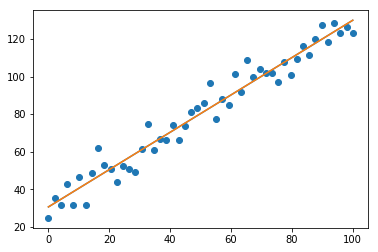

In [278]:
b = t_mean - a*x_mean
plt.scatter(x, t)
plt.plot(x, y)
plt.plot(x, a*x + b)

In [267]:
class hoge:
    def __init__(self, x):
        self._a = x

class fuga(hoge):
    def __init__(self, x):
        super().__init__(x)

    @property
    def a(self):
        return self._a * 100
    
    @a.setter
    def a(self, x):
        self._a //= x
    
    def __add__(self, x):
        self._a += x

aa = fuga(10)
print(aa.a)
aa.a = 2
print(aa.a)
aa + 1
aa.a

1000
500


600